In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [157]:
cardf = pd.read_csv('s3://mypersonalizedbucket/cardata.csv')

In [158]:
cardf

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5
...,...,...,...,...,...,...,...,...,...
1956,Corvette,2016,240.0,28.0,49700,4,Uptown Cars,2019-09-09,9
1957,Corvette,2016,335.0,20.5,66350,2,Car Town,2017-04-29,4
1958,Corvette,2001,394.0,15.5,128000,4,Uptown Cars,2002-05-15,5
1959,Corvette,2002,394.0,15.5,130000,2,Uptown Cars,2002-05-07,5


In [159]:
monthSalesDf = cardf.groupby('sold_month').count()['car']

Text(0.5, 1.0, 'Sales for each month')

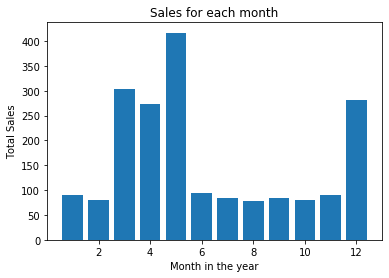

In [160]:
## Which month generates the most sales? Appears to be May
plt.bar(monthSalesDf.index.values,monthSalesDf.values)
plt.ylabel('Total Sales')
plt.xlabel('Month in the year')
plt.title('Sales for each month')


In [161]:
salesmanDf = cardf.groupby('salesman').count()['car']

Text(0.5, 1.0, 'Number of cars sold by each salesman')

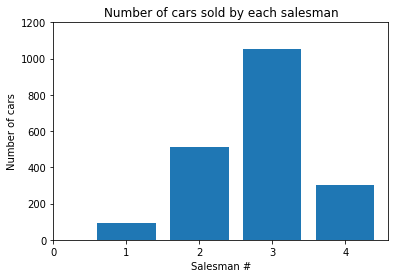

In [162]:
## Which car salesman sold the most cars? Appears to be Salesman # 3
plt.bar(salesmanDf.index.values,salesmanDf.values)
plt.ylabel('Number of cars')
plt.xlabel('Salesman #')
plt.xticks(np.arange(0,5,1))
plt.yticks(np.arange(0,1201,200))
plt.title('Number of cars sold by each salesman')

In [163]:
DealershipDf = cardf.groupby('dealership').count()['car']

Text(0.5, 1.0, 'Number of cars sold by each dealership')

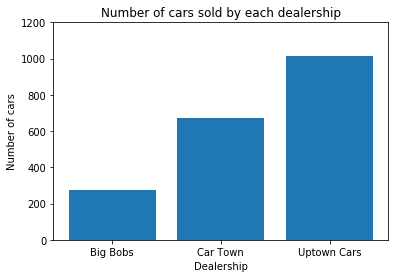

In [164]:
## Which car salesman sold the most cars? Appears to be Salesman # 3
plt.bar(DealershipDf.index.values,DealershipDf.values)
plt.ylabel('Number of cars')
plt.xlabel('Dealership')
plt.yticks(np.arange(0,1201,200))
plt.title('Number of cars sold by each dealership')

In [165]:
# Adding year column to original dataframe
# pd.to_datetime(cardf['sold_date']) is used to convert the sold_date column to actual date time
# It is then wrapped around the DatetimeIndex function and have the year extracted from that object
cardf['soldDateYr'] = pd.DatetimeIndex(pd.to_datetime(cardf['sold_date'])).year

In [166]:
corvettePriceYearDf = cardf[cardf['car']=='Corvette'].groupby('soldDateYr').mean()['price']


Text(0.5, 1.0, 'Average price of Corvette per year')

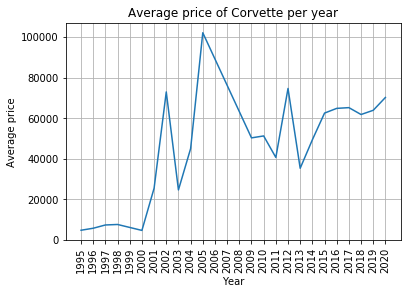

In [167]:
## In what year was the average price of a Corvette greater than 100K? Appears to be 2005
plt.plot(corvettePriceYearDf.index.values,corvettePriceYearDf.values)
plt.ylabel('Average price')
plt.xlabel('Year')
plt.xticks(np.arange(1995,2021,1),rotation = 90)
plt.grid(True)
plt.title('Average price of Corvette per year')

In [168]:
corvetteEngine = cardf[cardf['car']=='Corvette']['engine_hp'].values
mustangEngine =  cardf[cardf['car']=='Mustang']['engine_hp'].values
camaroEngine = cardf[cardf['car']=='Camaro']['engine_hp'].values

([<matplotlib.axis.YTick at 0x7fbdd78a1f60>,
 <a list of 3 Text yticklabel objects>)

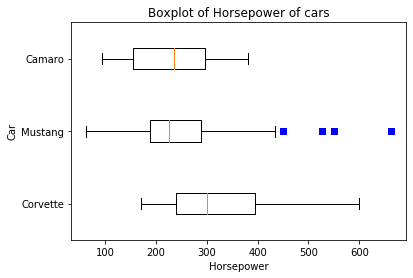

In [169]:
##Which car has several points in the box plot's far right upper quartile for the engine's horsepower ?
## Appears to be Mustang
plt.boxplot([corvetteEngine,mustangEngine,camaroEngine],0,'bs',0)
plt.xlabel('Horsepower')
plt.ylabel('Car')
plt.title('Boxplot of Horsepower of cars')
plt.yticks([1, 2,3], ['Corvette', 'Mustang','Camaro'])